29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


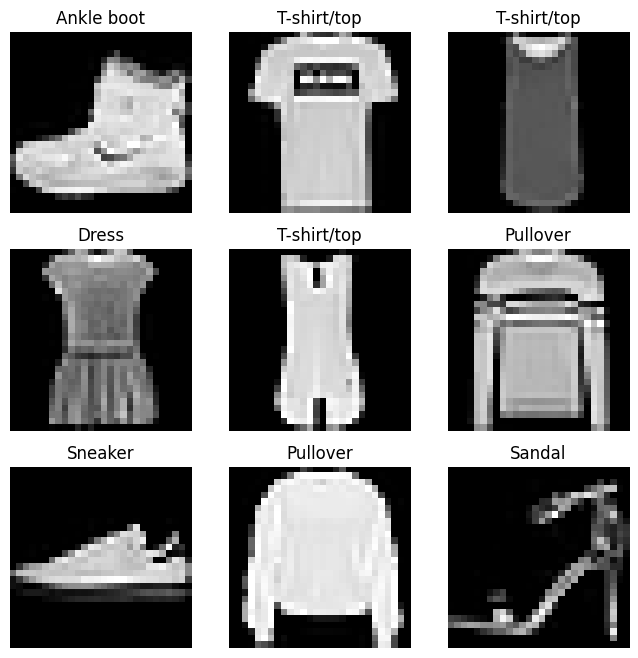

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.7741 - loss: 0.6262 - val_accuracy: 0.8598 - val_loss: 0.3917
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.8848 - loss: 0.3159 - val_accuracy: 0.8871 - val_loss: 0.3117
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9025 - loss: 0.2619 - val_accuracy: 0.8988 - val_loss: 0.2784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9136 - loss: 0.2276 - val_accuracy: 0.9088 - val_loss: 0.2525
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9283 - loss: 0.1949 - val_accuracy: 0.8951 - val_loss: 0.2827
313/313 - 3s - 11ms/step - accuracy: 0.8951 - loss: 0.2827

✅ Test Accuracy: 0.8950999975204468
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


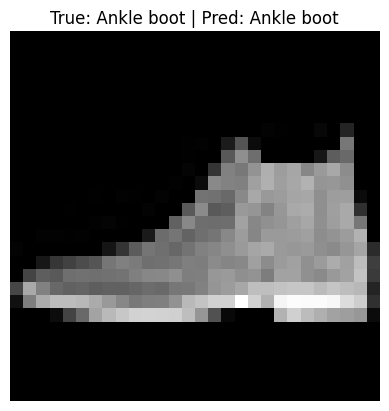

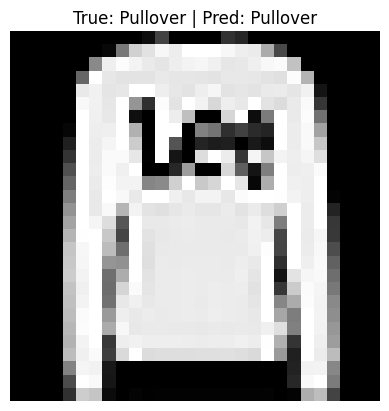

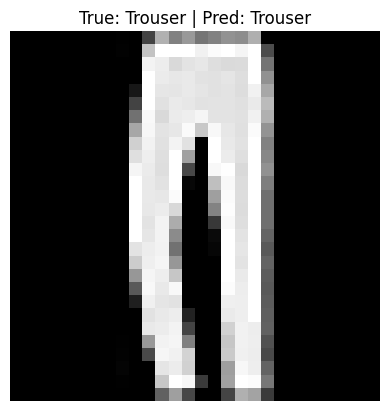

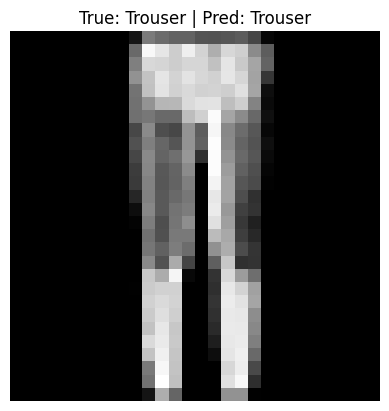

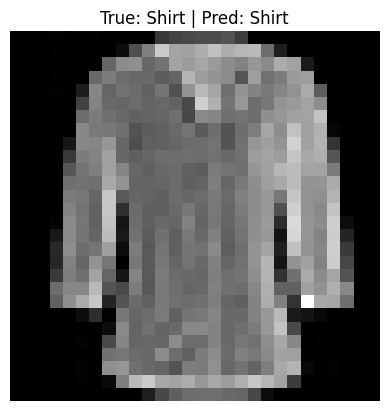

In [ ]:
# ===============================
# Image Classification Demo
# Using Fashion-MNIST Dataset
# Grey-Scale Images in Dataset
# ===============================

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load Dataset (Fashion-MNIST is already available in Keras)
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape (CNN expects 4D input: samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 2. Class names for visualization
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 3. Visualize some images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

# 4. Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu')
    layers.Dense(10, activation='softmax')
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

# 8. Make predictions on test images
predictions = model.predict(x_test[:5])

# Show predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {class_names[y_test[i]]} | Pred: {class_names[predictions[i].argmax()]}")
    plt.axis("off")
    plt.show()
